In [34]:
import os
print(os.getcwd())

/workspace/projects/b01-baselineLightGBM


In [35]:
import pickle
import pandas as pd

feature_importance_df = pd.read_csv('./res/feature_importance.csv',index_col=0)
with open('./res/learning_history.pkl','rb') as rb:
    learning_history = pickle.load(rb)
eval_df = pd.read_csv('./res/cv_eval.csv',index_col=0)

In [36]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [37]:
for c in eval_df:
    print(c)

auc
precision
recall
f


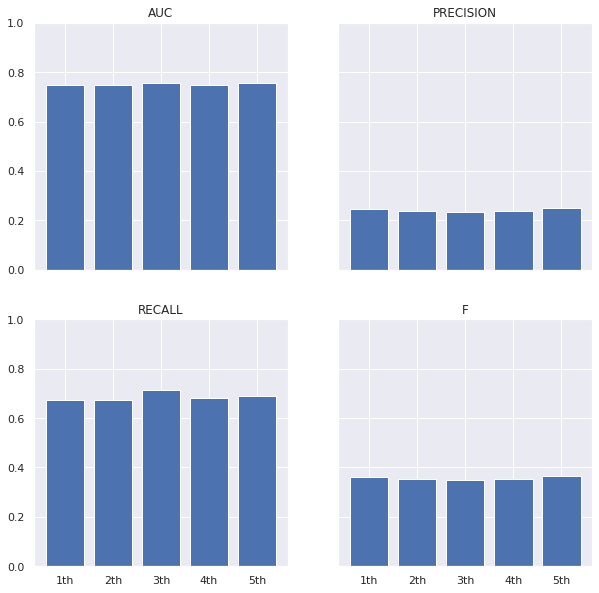

In [38]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10),sharey=True,sharex=True)
axs = axs.flatten()
for i,metric in enumerate(eval_df):
    axs[i].bar(
        eval_df.index,
        eval_df[metric],
        )
    axs[i].set_title(metric.upper())
    axs[i].set_ylim([0,1])
    axs[i].grid(True)

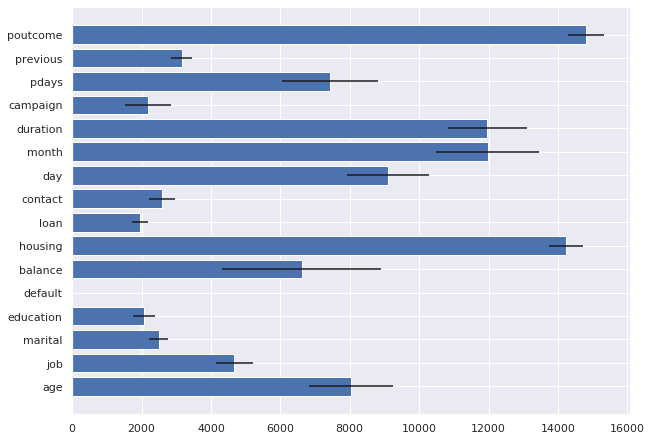

In [39]:
fig,axs = plt.subplots(figsize=(10,7.5))
axs.barh(
    feature_importance_df.index,
    feature_importance_df.mean(axis=1),
    xerr=feature_importance_df.std(axis=1),
    )
axs.grid(True)

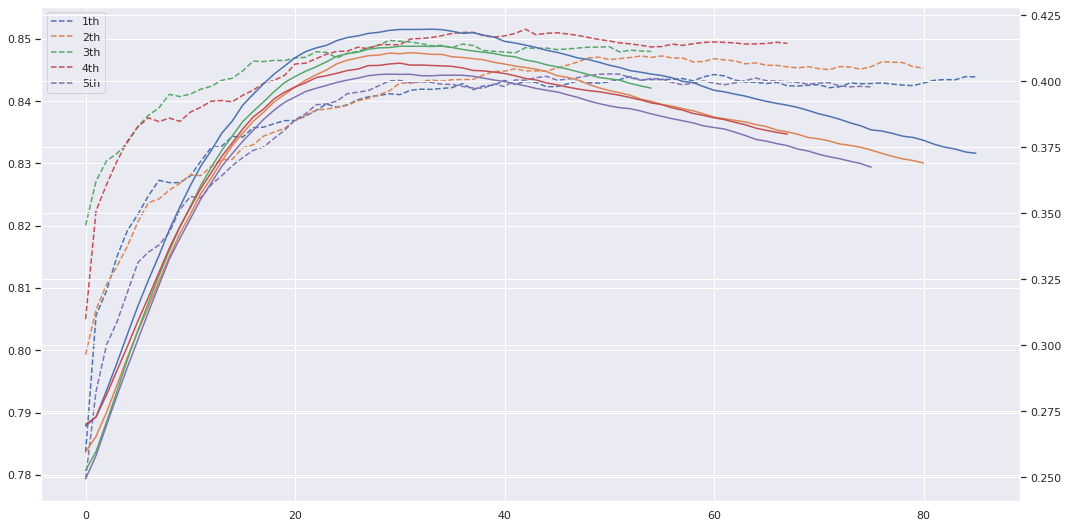

In [40]:
cmap = plt.get_cmap("tab10")

fig,axs = plt.subplots(figsize=(15,7.5))
twn = axs.twinx()
for i,cv_i in enumerate(learning_history):
    color = cmap(i)
    for valid_name in learning_history[cv_i]:
        for metric, his in learning_history[cv_i][valid_name].items():
            # if metric!='auc':
            #     axs.plot(his,
            #              color=color,
            #              #linestyle=linestyle,
            #              label=f'{cv_i}-{valid_name}',
            #              )
            if metric=='auc':
                axs.plot(his,linestyle='dashed',label=f'{cv_i}')
            else:
                twn.plot(his,linestyle='solid',label=f'{cv_i}')
axs.legend()
fig.tight_layout()

In [41]:
# import plotly.tools as tls
# from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
# ## convert and plot in plotly
# plotly_fig = tls.mpl_to_plotly(fig)
# iplot(plotly_fig)